# Introduksjon
Vi vil i dette prosjektet se nærmere på dispersjon fenomenet. Dispersjon kommer fra den latinske
ordet «dispersio» som betyr fordeling eller oppdeling. Den elektromagnetiske bølgen, samt lys blir
dispergert. Når lyset beveger seg gjennom et materialmediet, kan det dele seg i bølger med
forskjellige frekvenser. Vi vil i dette prosjektet finne ut hvordan kan lys betraktes som en bølge,
samtidig som vi skal se nærmere på dobbeltspalteeksperimentet utført av Thomas Young. Alle
simuleringer skal vises med Python. 

# Bakgrunn
Isaac Newton er kjent for sin oppdagelse av at hvit lys består av et spekter av farger (Newtons fargespekter). I sin undersøkelse tok han utgangspunktet i brytningen av hvit lys når det passerte gjennom et prisme. Dispersjon av hvit lys skyldes variasjon i brytningsindeksen for prismen, dvs. at lysets hastighet i prismen avhenger av lysets bølgelengde. Hastigheten avtar med avtagende bølgelengde. Dette betyr at brytningsindeksen, som er omvendt proporsjonal med hastigheten, øker med avtagende bølgelengde. Med denne relasjon kan bl.a. plassering av farger i en regnbue foklares.

De fleste optiske fenomener i hverdagen kan foklares med en forenklet model, altså at lys er en samling av stråler som følger reglene for optikk. Men når dimensjonene til gjenstander og blenderåpninger nærmer seg bølgelengden til lys, kan ikke bølgekarakteren til lys ignoreres. Thomas Young viste at et interferensmønster produseres når lys fra to kilder overlapper hverandre. Dette demonstrerte tydelig at lys har bølgelignende egenskaper. 

Et definerende kjennetegn ved bølger er superposisjon. Den beskriver oppførselen til overlappende bølger. Superposisjonsprinsippet sier at når to eller flere bølger overlapper i rommet, er den resulterende forstyrrelsen lik den algebraiske summen av individuelle forstyrrelser. Denne enkle underliggende atferden fører til en rekke effekter som kollektivt kalles interferensfenomener. Det er to ekstreme grenser for interferenseffekter. Ved konstruktiv forstyrrelse faller to bølger sammen og bølgene sies å være i fase med hverandre. Deres overposisjon resulterer i en forsterkning av forstyrrelsen; amplituden til den resulterende kombinerte bølgen er summen av de individuelle amplitudene. Omvendt, i destruktiv forstyrrelse, faller toppen av en bølge sammen med dalen til en annen bølge, og de sies å være ute av fase. Amplituden til den kombinerte bølgen er lik forskjellen mellom amplitudene til de enkelte bølgene. I det spesielle tilfellet der de individuelle amplitudene er like, er den destruktive forstyrrelsen fullført, og nettforstyrrelsen til mediet er null.

Observasjonen av interferenseffekter indikerer definitivt tilstedeværelsen av overlappende bølger. Thomas Young postulerte at lys er en bølge og er underlagt superposisjonsprinsippet; hans store eksperimentelle prestasjon var å demonstrere den konstruktive og destruktive interferensen av lys. I en moderne versjon av Youngs eksperiment, som avviker i det vesentlige bare når det gjelder lyskilden, lyser en laser like opp to parallelle spalter i en ellers ugjennomsiktig overflate. Lyset som passerer gjennom de to spaltene blir observert på en fjern skjerm. Når bredden på spaltene er betydelig større enn lysets bølgelengde, holder reglene for geometrisk optikk - lyset kaster to skygger, og det er to opplyste områder på skjermen. Når spaltene er innsnevret i bredden, trekker lyset seg imidlertid inn i den geometriske skyggen, og lysbølgene overlapper hverandre på skjermen. 

# Simuleringer

<img src="https://en.wikipedia.org/wiki/Double-slit_experiment#/media/File:Interference_electrons_double-slit_at_10cm.png" alt="Double_slit_experiment.png" />

Vi tar utgangspunktet i bilded vist overfor. Vi ønsker å importere resultatene til Python. Vi starter med å importere alle nødvendige bibloteker for våre simuleringer:

In [1]:
# Importering av biblioteker
import numpy as np
import matplotlib.pyplot as plt

Vi definerer deretter plotens størrelse

In [2]:
#Definisjon av plotens størrelse
x_min = 0
x_maks = 10
y_min = -5
y_maks = 5

Vi definerer antall punkter vi ønsker å ha med i plotet

In [3]:
#Antall punkter
x_punkter = 200
y_punkter = 200

Vi lager en Array for videre simuleringer

In [4]:
#Lager en Array for ploting av resultater
x = np.linspace(x_min, x_maks, x_punkter)
y = np.linspace(y_min, y_maks, y_punkter)

Og ut fra disse lager vi en matrise

In [5]:
#Lager matrise
xv, yv = np.meshgrid(x, y)

Vi prøver nå å finne alle disse punktene. Vi omformer våre matriser

In [6]:
#Omforming
punkter= np.concatenate([xv.reshape(-1, 1), yv.reshape(-1, 1)], axis=-1)

Vi nå definerer "lys" kildene. 

In [7]:
#Definering av kilder
kilde_1 = np.array([0, 0.5])
kilde_2 = np.array([0, -0.5])

Vi finner nå avstand

In [8]:
#Avstand
punkter_1 = punkter - kilde_1
punkter_2 = punkter - kilde_2

Vi definerer amplituden og bølgetallet. Foreløpig så har vi

In [9]:
#Amplitude
a_1 = 4
a_2 = 4

#Bolgetall
k = 20

Vi definerer nå bølgene. Vi bruker omregningen fra karteiske koordinater til poolarkoordinater, altså avstand $\sqrt{x^2+y^2}$

In [10]:
#Bolge 1 og 2
b_1 = a_1*(np.sin( k * (punkter_1[:, 0]**2 + punkter_1[:, 1]**2)**0.5))
b_2 = a_2*(np.sin( k * (punkter_2[:, 0]**2 + punkter_2[:, 1]**2)**0.5))

Vi bruker superposisjonsprinsippet. For hver punktet vil amplituden bli lik 

In [11]:
#Superposisjon
A = (b_1 + b_2)

Intensitet til et punkt er direkte proporsjonal til kvadraten av amplituden A, altså

In [12]:
#Intensitet
I = A**2

Vi ploter resultatene

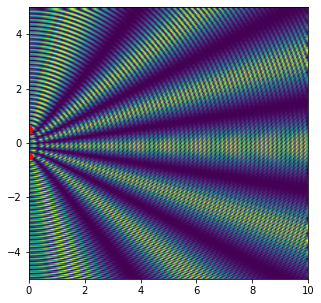

In [13]:
plt.figure(figsize=(5, 5))
plt.xlim(x_min, x_maks)
plt.ylim(y_min, y_maks)
plt.scatter(punkter[:, 0], punkter[:, 1], c = I)

#Tegner opp spalter/lysemitter
plt.scatter(*kilde_1, c='r')
plt.scatter(*kilde_2, c='r')
plt.show()

De fargende/lyse områder på ploter er når bølgene er i fase med hverandre, dvs. en konstruktiv forstyrrelse. Den mørke området på plotet er når bølgene er ute av fase,  dvs. en destruktiv forstyrrelse. Vi lager nå animasjon av resultater. Vi velger variablene

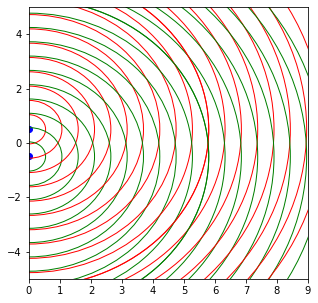

In [ ]:
from IPython.display import display, clear_output

r = np.linspace(x_min, x_maks, int((x_maks-x_min)/0.5))
h = 0.1

fig, ax = plt.subplots(figsize=(5, 5))
plt.xlim(x_min, x_maks-1) #Vi velger x_maks for at animasjon skal se bedre ut
plt.ylim(y_min, y_maks)

c_1 = []
c_2 = []

for i in r:
  sirkel_1 = plt.Circle(kilde_1, facecolor=(0.8, 0, 0, 0), edgecolor='r')
  c_1.append(ax.add_artist(sirkel_1))

  sirkel_2 = plt.Circle(kilde_2, facecolor=(0.8, 0, 0, 0), edgecolor='g')
  c_2.append(ax.add_artist(sirkel_2))

plt.scatter(*kilde_1, c='b')
plt.scatter(*kilde_2, c='b')

for j in range(10000):
  [c.set_radius(r[i]) for i, c in enumerate(c_1)]
  [c.set_radius(r[i]) for i, c in enumerate(c_2)]
  r = (r + h)%(x_maks-x_min)
  clear_output(wait=True)
  display(fig)

Her kan vi se den animerte versjonen av interferasjon av bølger. 

# Konklusjon

Vi kan se tydelig at lyset kan betraktes som en bølge. Young har vist med sin eksperimentet at interpolasjon er en metode for å fremvise lys som en en bølge. Våre simuleringer viser tydelig at hans eksperiment kan bli også bekreftet med datasimuleringer. Med dagens teori, vett vi at lyset er ikke en bølge, men kan på mange måter beholde seg som en bølge.  